In [9]:
import pandas as pd
import numpy as np
from scipy.integrate import cumtrapz
from scipy.signal import detrend
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# RUTAS

In [10]:
"""MUESTREOS Pt1"""
pt1_1 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor1.csv"
pt1_2 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor2.csv"
pt1_3 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor3.csv"
pt1_4 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor4.csv"
pt1_5 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor5.csv"
pt1_6 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor6.csv"
pt1_7 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor7.csv"
pt1_8 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor8.csv"
pt1_9 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor9.csv"
pt1_10 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor10.csv"
pt1_11 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor11.csv"
pt1_12 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor12.csv"
pt1_13 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor13.csv"
pt1_14 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor14.csv"
pt1_15 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor15.csv"
pt1_16 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor16.csv"
pt1_17 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor17.csv"

"""MUESTREOS Pt2"""

pt2_1 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor1.csv"
pt2_2 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor2.csv"
pt2_3 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor3.csv"
pt2_4 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor4.csv"
pt2_5 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor5.csv"
pt2_6 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor6.csv"
pt2_7 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor7.csv"
pt2_8 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor8.csv"
pt2_9 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor9.csv"
pt2_10 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor10.csv"
pt2_11 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor11.csv"
pt2_12 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor12.csv"
pt2_13 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor13.csv"
pt2_14 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor14.csv"
pt2_15 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor15.csv"
pt2_16 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor16.csv"
pt2_17 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor17.csv"

# Función integrar

In [11]:

def integrar(path, time1, muestreo):
    output_filename=rf"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\LAB 03 FORZADO\Pos vs tiempo {muestreo} Hz (de muestreo) forzado con amortiguamiento.csv"

    #"C:\Users\chelo\Documents\Vibras laboratorio 3\Pos vs tiempo {muestreo} Hz (de muestreo).csv"
    # Cargar los datos desde el archivo CSV
    data = pd.read_csv(path, sep=",", names=["tiempo", "aceleracion"],header=1)

    # Filtrar datos hasta el tiempo especificado
    data = data[data["tiempo"] <= time1]


    # Convertir aceleración de g a m/s²
    data["aceleracion"] *= 9.81
    
    # Graficar la aceleración para verificar su forma
    plt.figure()
    plt.plot(data["tiempo"], data["aceleracion"], label="Aceleración (m/s²)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Aceleración (m/s²)")
    #plt.title("Aceleración en función del tiempo")
    plt.legend()
    plt.show()

    # Integrar la aceleración para obtener la velocidad
    velocidad = cumtrapz(data["aceleracion"], data["tiempo"], initial=0)

    # Integrar la velocidad para obtener la posición
    posicion = cumtrapz(velocidad, data["tiempo"], initial=0)
    posicion = detrend(posicion)

    # Ajustar el tamaño del DataFrame para que coincida con las longitudes de 'velocidad' y 'posicion'
    data = data.iloc[:len(velocidad)]

    # Agregar las columnas de velocidad y posición al DataFrame
    data["velocidad"] = velocidad
    data["posicion"] = posicion

    # Crear una nueva columna con "tiempo" y "posicion" combinados, separados por un espacio
    data["tiempo_posicion"] = data["tiempo"].astype(str) + "," + data["posicion"].astype(str)

    # Guardar solo la columna combinada en el archivo CSV especificado
    data[["tiempo_posicion"]].to_csv(output_filename, index=False, header=False)

    # Graficar posición vs tiempo
    plt.figure()
    plt.plot(data["tiempo"], data["posicion"], label="Posición (m)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (m)")
    #plt.title("Posición vs. Tiempo")
    plt.legend()
    plt.show()

    return data["posicion"]



# integrar forzado innnecesaria creo

In [ ]:
def integrar_forzado_amortiguado(path,forzamiento, time1):
    #output_filename=rf"c:\Users\chelo\Documents\Vibras laboratorio 3\Forzado\Pos vs tiempo (forzado) {forzamiento} Hz (de muestreo).csv"
    output_filename=rf"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\LAB 03 FORZADO\Pos vs tiempo (forzado con amortiguamiento) {forzamiento} Hz (de muestreo).csv"
    # Cargar los datos desde el archivo CSV
    data = pd.read_csv(path, sep="\t", names=["tiempo", "aceleracion"],header=1)
    # Filtrar datos hasta el tiempo especificado
    data = data[data["tiempo"] <= time1]

    # Convertir aceleración de g a m/s²
    data["aceleracion"] *= 9.81
    
    # Graficar la aceleración para verificar su forma
    plt.figure()
    plt.plot(data["tiempo"], data["aceleracion"], label="Aceleración (m/s²)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Aceleración (m/s²)")
    #plt.title("Aceleración en función del tiempo")
    plt.legend()
    plt.show()

    # Integrar la aceleración para obtener la velocidad
    velocidad = cumtrapz(data["aceleracion"], data["tiempo"], initial=0)

    # Integrar la velocidad para obtener la posición
    posicion = cumtrapz(velocidad, data["tiempo"], initial=0)
    posicion = detrend(posicion)

    # Ajustar el tamaño del DataFrame para que coincida con las longitudes de 'velocidad' y 'posicion'
    data = data.iloc[:len(velocidad)]

    # Agregar las columnas de velocidad y posición al DataFrame
    data["velocidad"] = velocidad
    data["posicion"] = posicion

    # Crear una nueva columna con "tiempo" y "posicion" combinados, separados por un espacio
    data["tiempo_posicion"] = data["tiempo"].astype(str) + "," + data["posicion"].astype(str)

    # Guardar solo la columna combinada en el archivo CSV especificado
    data[["tiempo_posicion"]].to_csv(output_filename, index=False, header=False)

    # Graficar posición vs tiempo
    plt.figure()
    plt.plot(data["tiempo"], data["posicion"], label="Posición (m)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (m)")
    #plt.title("Posición vs. Tiempo")
    plt.legend()
    plt.show()

    return data["posicion"]

# Llama a la función con el archivo adecuado, tiempo de corte y nombre de salida
def ajuste_func1(t, A, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A *np.sin(omega * t + phi)
def ajuste_func2(t, A, B, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A * np.exp(-B * t) * np.sin(omega * t + phi)

# frecuecia nat

In [13]:
def calcular_frecuencia(posicion, tiempo):
    # Número de puntos
    N = len(posicion)
    # Calcular el intervalo de muestreo (asume tiempos igualmente espaciados)
    T = np.mean(np.diff(tiempo))  # Periodo de muestreo
    # Aplicar la FFT a la señal de posición
    fft_vals = fft(posicion)
    # Calcular las frecuencias correspondientes
    frecuencias = fftfreq(N, T)
    # Considerar solo las frecuencias positivas
    fft_vals = np.abs(fft_vals[:N // 2])
    frecuencias = frecuencias[:N // 2]
    # Encontrar la frecuencia dominante
    frecuencia_dominante = frecuencias[np.argmax(fft_vals)]

    return frecuencia_dominante

# pruebas

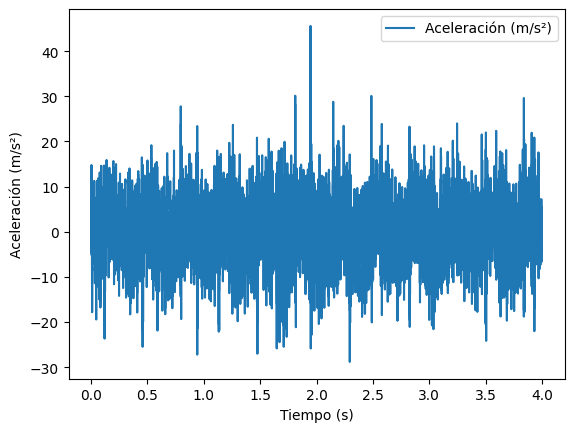

C:\Users\crist\AppData\Local\Temp\ipykernel_8736\1107938796.py:25: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  velocidad = cumtrapz(data["aceleracion"], data["tiempo"], initial=0)
C:\Users\crist\AppData\Local\Temp\ipykernel_8736\1107938796.py:28: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  posicion = cumtrapz(velocidad, data["tiempo"], initial=0)


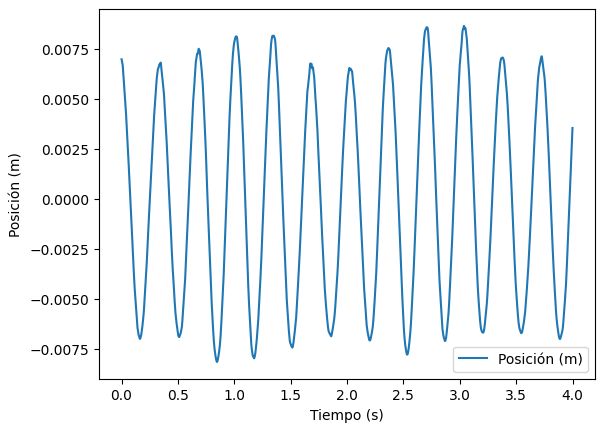

0        0.006989
1        0.006975
2        0.006962
3        0.006948
4        0.006934
           ...   
10234    0.003331
10235    0.003386
10236    0.003442
10237    0.003499
10238    0.003555
Name: posicion, Length: 10239, dtype: float64

In [14]:
integrar(pt2_5,5,10)

In [15]:
# Desde la función integrar, después de calcular la posición
frecuencia = calcular_frecuencia(data["posicion"].values, data["tiempo"].values)

print(f"La frecuencia dominante es: {frecuencia:.2f} Hz")


NameError: name 'data' is not defined

#

In [ ]:
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

def analizar_frecuencias(data, fs=10240):
    # Calcula la FFT
    N = len(data)
    yf = fft(data)
    xf = fftfreq(N, 1 / fs)[:N // 2]  # Frecuencias positivas

    # Magnitud de la FFT
    amplitud = 2.0 / N * np.abs(yf[:N // 2])

    # Graficar el espectro de frecuencias
    plt.figure()
    plt.plot(xf, amplitud, label="Espectro de amplitud")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.show()

    # Encontrar picos
    peaks, _ = find_peaks(amplitud, height=0.01)  # Ajusta 'height' según tu señal
    frecuencias_picos = xf[peaks]
    amplitudes_picos = amplitud[peaks]

    # Mostrar los picos
    print("Frecuencias principales detectadas:")
    for f, a in zip(frecuencias_picos, amplitudes_picos):
        print(f"Frecuencia: {f:.2f} Hz, Amplitud: {a:.4f}")

    return frecuencias_picos, amplitudes_picos


In [ ]:
analizar_frecuencias(pt2_1,10240)

ValueError: could not convert string to float: 'C:\\Uchile\\8vo semestre\\Vibraciones Mecanicas\\repositorio vibras\\Datos_L3\\pt2\\DataRecor1.csv'

In [ ]:
#Función que utiliza ajustes para la señal de posición vs tiempo. De esta manera se obtiene el parámetro B, delta, xi y por lo tanto w_n=B/xi

def Valor_X(path, time1=10):
    # Cargar los datos y asegurar que se lean como texto
    tabla = pd.read_csv(path, sep=",", header=None, names=["tiempo_posicion"], dtype={"tiempo_posicion": str})
    
    # Separar los valores en las columnas 'tiempo' y 'posición'
    tabla[['tiempo', 'posición']] = tabla['tiempo_posicion'].str.split(',', expand=True).astype(float)

    # Filtrar datos hasta el tiempo especificado
    tabla_filtrada = tabla[tabla["tiempo"] <= time1]

    # Datos de tiempo y posición filtrados
    tiempo = tabla_filtrada["tiempo"].values
    posicion = tabla_filtrada["posición"].values

    # Definir la función de ajuste incluyendo la frecuencia como parámetro
    def ajuste_func(t, A, B, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A * np.exp(-B * t) * np.sin(omega * t + phi)

    # Realizar el ajuste, especificando 4.7 como semilla para la frecuencia
    params, _ = curve_fit(ajuste_func, tiempo, posicion, p0=[1, 0.1, 4.7, 0])

    # Obtener los parámetros ajustados
    A, B, frecuencia, phi = params
    print(f"A = {A}, B = {B}, frecuencia = {frecuencia}, phi = {phi}")

    # Generar la función ajustada en el intervalo de tiempo
    tiempo_ajustado = np.linspace(0, time1, 1000)
    posicion_ajustada = ajuste_func(tiempo_ajustado, A, B, frecuencia, phi)

    # Encontrar todos los picos
    picos, _ = find_peaks(posicion_ajustada)

    # Obtener los tiempos y valores de todos los picos
    tiempos_picos = tiempo_ajustado[picos]
    valores_picos = posicion_ajustada[picos]

    # Calcular delta para cada par de picos consecutivos
    deltas = []
    for i in range(len(valores_picos) - 1):
        delta = np.log(valores_picos[i] / valores_picos[i + 1])
        deltas.append(delta)
        print(f"Delta entre pico {i+1} y pico {i+2}: {delta:.4f}")

    # Calcular el promedio de todos los deltas
    promedio_delta = np.mean(deltas)
    print("Promedio de delta:", promedio_delta)

    # Calcular el coeficiente de amortiguamiento xhi usando el promedio de delta
    xhi = promedio_delta / (np.sqrt(4 * np.pi**2 + promedio_delta**2))
    frecuencia_natural = B / xhi
    print("xhi:", xhi)
    print("frecuencia natural (rad/s):", frecuencia_natural)
    print("nu natural (Hz):", frecuencia_natural / (2 * np.pi))

    # Graficar los datos, el ajuste y los picos
    plt.plot(tabla["tiempo"], tabla["posición"], 'b-', label="Datos sin filtrar")
    plt.plot(tiempo_ajustado, posicion_ajustada, 'r--', label=f"Ajuste hasta {time1}s")
    plt.plot(tiempos_picos, valores_picos, 'go', label="Picos")
    plt.xlabel("Tiempo")
    plt.ylabel("Posición")
    plt.legend()
    plt.show()



# frec natural

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def obtener_frecuencia_natural(numeropat, muestreo):
    
    # Leer el archivo CSV que contiene tiempo y posición
    data = pd.read_csv(rf"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\LAB 03 FORZADO\Pos vs tiempo {numeropat} Hz (de muestreo) forzado con amortiguamiento.csv"
, sep=",", names=["tiempo", "posicion"], header=None)
    
    # Convertir a valores numéricos
    data["tiempo"] = pd.to_numeric(data["tiempo"], errors='coerce')
    data["posicion"] = pd.to_numeric(data["posicion"], errors='coerce')
    
    # Limpiar datos con valores no numéricos
    data = data.dropna()

    # Obtener la frecuencia de muestreo en Hz
    frecuencia_muestreo = muestreo  # En Hz

    # Calcular la Transformada Rápida de Fourier (FFT)
    n = len(data["posicion"])  # Número de muestras
    fft_result = np.fft.fft(data["posicion"])
    fft_freqs = np.fft.fftfreq(n, d=1/frecuencia_muestreo)  # Frecuencias asociadas

    # Mantener solo la mitad positiva del espectro (frecuencias reales)
    fft_result = np.abs(fft_result[:n // 2])
    fft_freqs = fft_freqs[:n // 2]

    # Identificar picos en el espectro de frecuencias
    peaks, _ = find_peaks(fft_result, height=0.05 * max(fft_result))  # Ajustar altura según sea necesario
    frecuencias_naturales = fft_freqs[peaks]

    # Graficar el espectro de frecuencias
    plt.figure(figsize=(10, 6))
    plt.plot(fft_freqs, fft_result, label="Espectro de Fourier")
    plt.scatter(frecuencias_naturales, fft_result[peaks], color="red", label="Frecuencias naturales")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Amplitud")
    plt.title("Análisis de Fourier - Frecuencias Naturales")
    plt.legend()
    plt.grid()
    plt.show()

    # Imprimir las frecuencias naturales más destacadas
    print(f"Frecuencias naturales detectadas: {frecuencias_naturales} Hz")

    return frecuencias_naturales


In [ ]:
obtener_frecuencia_natural(5,10240)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Uchile\\8vo semestre\\Vibraciones Mecanicas\\repositorio vibras\\LAB 03 FORZADO\\Pos vs tiempo 5 Hz (de muestreo) forzado con amortiguamiento.csv'

In [ ]:
#Función que utiliza ajustes para la señal de posición vs tiempo. De esta manera se obtiene el parámetro B, delta, xi y por lo tanto w_n=B/xi

def frecuencia_natural(path, time1=10):
    # Cargar los datos y asegurar que se lean como texto
    tabla = pd.read_csv(path, sep=",", header=None, names=["tiempo_posicion"], dtype={"tiempo_posicion": str})
    
    # Separar los valores en las columnas 'tiempo' y 'posición'
    tabla[['tiempo', 'posición']] = tabla['tiempo_posicion'].str.split(',', expand=True).astype(float)

    # Filtrar datos hasta el tiempo especificado
    tabla_filtrada = tabla[tabla["tiempo"] <= time1]

    # Datos de tiempo y posición filtrados
    tiempo = tabla_filtrada["tiempo"].values
    posicion = tabla_filtrada["posición"].values

    # Definir la función de ajuste incluyendo la frecuencia como parámetro
    def ajuste_func(t, A, B, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A * np.exp(-B * t) * np.sin(omega * t + phi)

    # Realizar el ajuste, especificando 4.7 como semilla para la frecuencia
    params, _ = curve_fit(ajuste_func, tiempo, posicion, p0=[1, 0.1, 4.7, 0])

    # Obtener los parámetros ajustados
    A, B, frecuencia, phi = params
    print(f"A = {A}, B = {B}, frecuencia = {frecuencia}, phi = {phi}")

    # Generar la función ajustada en el intervalo de tiempo
    tiempo_ajustado = np.linspace(0, time1, 1000)
    posicion_ajustada = ajuste_func(tiempo_ajustado, A, B, frecuencia, phi)

    # Encontrar todos los picos
    picos, _ = find_peaks(posicion_ajustada)

    # Obtener los tiempos y valores de todos los picos
    tiempos_picos = tiempo_ajustado[picos]
    valores_picos = posicion_ajustada[picos]

    # Calcular delta para cada par de picos consecutivos
    deltas = []
    for i in range(len(valores_picos) - 1):
        delta = np.log(valores_picos[i] / valores_picos[i + 1])
        deltas.append(delta)
        print(f"Delta entre pico {i+1} y pico {i+2}: {delta:.4f}")

    # Calcular el promedio de todos los deltas
    promedio_delta = np.mean(deltas)
    print("Promedio de delta:", promedio_delta)

    # Calcular el coeficiente de amortiguamiento xhi usando el promedio de delta
    xhi = promedio_delta / (np.sqrt(4 * np.pi**2 + promedio_delta**2))
    frecuencia_natural = B / xhi
    print("xhi:", xhi)
    print("frecuencia natural (rad/s):", frecuencia_natural)
    print("nu natural (Hz):", frecuencia_natural / (2 * np.pi))

    # Graficar los datos, el ajuste y los picos
    plt.plot(tabla["tiempo"], tabla["posición"], 'b-', label="Datos sin filtrar")
    plt.plot(tiempo_ajustado, posicion_ajustada, 'r--', label=f"Ajuste hasta {time1}s")
    plt.plot(tiempos_picos, valores_picos, 'go', label="Picos")
    plt.xlabel("Tiempo")
    plt.ylabel("Posición")
    plt.legend()
    plt.show()

